### Importing Libraries

In [1]:
# Libraries for data processing
import numpy as np
import pandas as pd
import os

# Libraries for deep learning
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

import cv2

## Downloading dataset from Kaggle 

In [50]:
# Install Kaggle if not installed
!pip install kaggle

# Move the kaggle.json file to the correct directory
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# Download the dataset from Kaggle
!kaggle datasets download -d msambare/fer2013

# Unzip the dataset
!unzip fer2013.zip

The syntax of the command is incorrect.
'cp' is not recognized as an internal or external command,
operable program or batch file.
'chmod' is not recognized as an internal or external command,
operable program or batch file.


Dataset URL: https://www.kaggle.com/datasets/msambare/fer2013
License(s): DbCL-1.0
fer2013.zip: Skipping, found more recently modified local copy (use --force to force download)


'unzip' is not recognized as an internal or external command,
operable program or batch file.


In [4]:
!kaggle datasets download -d msambare/fer2013
import zipfile
with zipfile.ZipFile('fer2013.zip', 'r') as zip_ref:
    zip_ref.extractall('fer2013')

Dataset URL: https://www.kaggle.com/datasets/msambare/fer2013
License(s): DbCL-1.0
fer2013.zip: Skipping, found more recently modified local copy (use --force to force download)


In [5]:
import os
os.listdir('fer2013')

['test', 'train']

In [6]:
import os

# List contents of the train directory
train_dir = 'fer2013/train'
print("Train Directory Contents:")
print(os.listdir(train_dir))

# List contents of the test directory
test_dir = 'fer2013/test'
print("\nTest Directory Contents:")
print(os.listdir(test_dir))

Train Directory Contents:
['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']

Test Directory Contents:
['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']


### Viewing the First 5 Images from Train Dataset

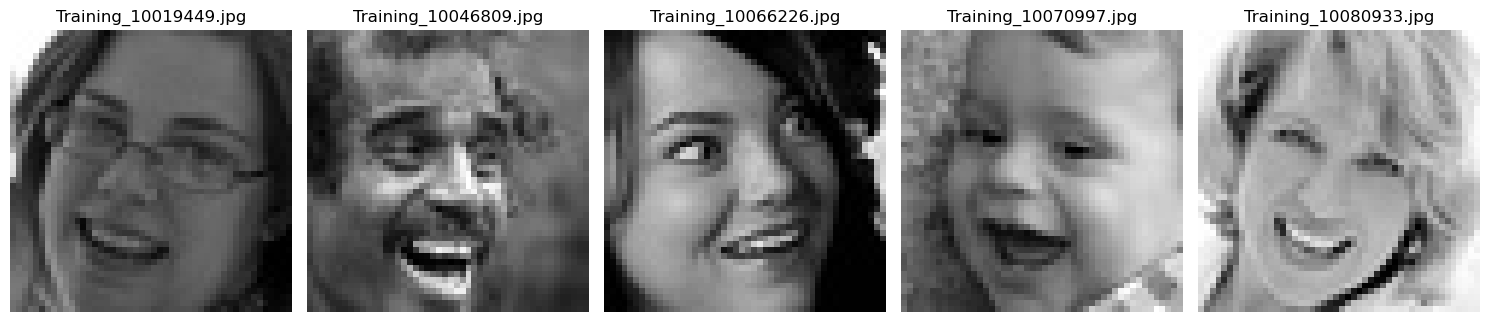

In [8]:
# Path to the happy folder
happy_dir = 'fer2013/train/happy'

# Get the list of image files
happy_images = os.listdir(happy_dir)[:5]  # Get the first 5 images

# Set up the plot
plt.figure(figsize=(15, 5))

# Loop through the images and display them
for i, image_file in enumerate(happy_images):
    # Read the image in grayscale
    image_path = os.path.join(happy_dir, image_file)
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    
    # Display the image
    plt.subplot(1, 5, i + 1)
    plt.imshow(image, cmap='gray')
    plt.axis('off')  # Hide the axes
    plt.title(image_file)  # Show the image filename

plt.tight_layout()
plt.show();

### Image Processing

In [9]:
import os
import cv2
import numpy as np

# Path to the train directory
train_dir = 'fer2013/train'

# Initialize lists to store images and labels
images = []
labels = []

# Define the desired image size
img_size = (48, 48)  # FER2013 images are typically 48x48

# Loop through each mood folder
for mood in os.listdir(train_dir):
    mood_dir = os.path.join(train_dir, mood)
    
    # Check if it's a directory
    if os.path.isdir(mood_dir):
        for image_file in os.listdir(mood_dir):
            # Read the image in grayscale
            image_path = os.path.join(mood_dir, image_file)
            image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
            
            # Resize the image
            image = cv2.resize(image, img_size)
            
            # Append the image and label
            images.append(image)
            labels.append(mood)  # Store the mood as the label

# Convert to numpy arrays
images = np.array(images)
labels = np.array(labels)

print(f'Processed {len(images)} images from {len(os.listdir(train_dir))} classes.')


Processed 28709 images from 7 classes.


In [10]:
from sklearn.model_selection import train_test_split
# Convert to numpy arrays
X = np.array(images)
y = np.array(labels)

# Split the dataset into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

print(f'Training set: {X_train.shape[0]} images')
print(f'Validation set: {X_val.shape[0]} images')

Training set: 22967 images
Validation set: 5742 images


In [11]:
# Get unique classes in the training set
unique_classes_train = np.unique(y_train)

# Get unique classes in the validation set
unique_classes_val = np.unique(y_val)

print("Classes in Training Set:")
print(unique_classes_train)

print("\nClasses in Validation Set:")
print(unique_classes_val)

Classes in Training Set:
['angry' 'disgust' 'fear' 'happy' 'neutral' 'sad' 'surprise']

Classes in Validation Set:
['angry' 'disgust' 'fear' 'happy' 'neutral' 'sad' 'surprise']


### Training the Model 

In [12]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical

# Normalize the images
X_train = X_train.astype('float32') / 255.0
X_val = X_val.astype('float32') / 255.0

# Convert labels to categorical format
# You may want to map the mood labels to integers first
mood_labels, y_train = np.unique(y_train, return_inverse=True)
y_train = to_categorical(y_train)

y_val = np.unique(y_val, return_inverse=True)[1]
y_val = to_categorical(y_val)

# Define the CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(48, 48, 1)),
    layers.MaxPooling2D(pool_size=(2, 2)),
    
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(len(mood_labels), activation='softmax')  # Number of classes
])

# Compile the model
model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

model.summary()

C:\Users\honey\anaconda_new\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 46, 46, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 23, 23, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 21, 21, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 10, 10, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 8, 8, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         262,272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 7)                   │             903 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 355,847 (1.36 MB)

 Trainable params: 355,847 (1.36 MB)

 Non-trainable params: 0 (0.00 B)

In [13]:
# Train the model
history = model.fit(X_train.reshape(-1, 48, 48, 1), y_train,
                    validation_data=(X_val.reshape(-1, 48, 48, 1), y_val),
                    epochs=10,  # Adjust epochs as needed
                    batch_size=32)

print("Model training complete!")

Epoch 1/10
718/718 ━━━━━━━━━━━━━━━━━━━━ 12s 14ms/step - accuracy: 0.2702 - loss: 1.7788 - val_accuracy: 0.4256 - val_loss: 1.5036
Epoch 2/10
718/718 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.4421 - loss: 1.4517 - val_accuracy: 0.4908 - val_loss: 1.3495
Epoch 3/10
718/718 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.5095 - loss: 1.2950 - val_accuracy: 0.5101 - val_loss: 1.2978
Epoch 4/10
718/718 ━━━━━━━━━━━━━━━━━━━━ 9s 13ms/step - accuracy: 0.5500 - loss: 1.1912 - val_accuracy: 0.5223 - val_loss: 1.2648
Epoch 5/10
718/718 ━━━━━━━━━━━━━━━━━━━━ 9s 13ms/step - accuracy: 0.5830 - loss: 1.1220 - val_accuracy: 0.5392 - val_loss: 1.2450
Epoch 6/10
718/718 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.6004 - loss: 1.0583 - val_accuracy: 0.5406 - val_loss: 1.2288
Epoch 7/10
718/718 ━━━━━━━━━━━━━━━━━━━━ 9s 13ms/step - accuracy: 0.6207 - loss: 1.0066 - val_accuracy: 0.5449 - val_loss: 1.2439
Epoch 8/10
718/718 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.6493 - loss: 0.9391 - val

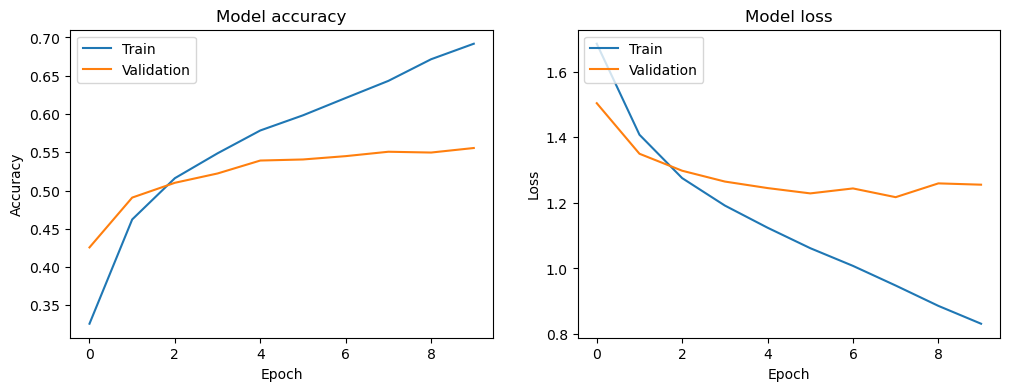

In [21]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

In [22]:
train_loss, train_accuracy = model.evaluate(X_train.reshape(-1, 48, 48, 1), y_train, verbose=0)
val_loss, val_accuracy = model.evaluate(X_val.reshape(-1, 48, 48, 1), y_val, verbose=0)

print(f'Training Loss: {train_loss:.4f}, Training Accuracy: {train_accuracy:.4f}')
print(f'Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_accuracy:.4f}')


Training Loss: 0.7251, Training Accuracy: 0.7406
Validation Loss: 1.2553, Validation Accuracy: 0.5556


180/180 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step


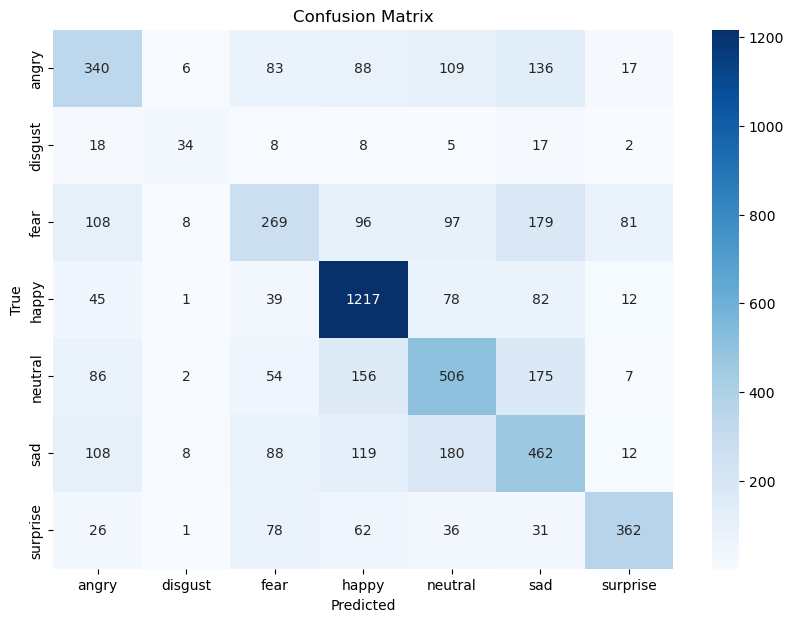

              precision    recall  f1-score   support

       angry       0.47      0.44      0.45       779
     disgust       0.57      0.37      0.45        92
        fear       0.43      0.32      0.37       838
       happy       0.70      0.83      0.76      1474
     neutral       0.50      0.51      0.51       986
         sad       0.43      0.47      0.45       977
    surprise       0.73      0.61      0.66       596

    accuracy                           0.56      5742
   macro avg       0.55      0.51      0.52      5742
weighted avg       0.55      0.56      0.55      5742



In [24]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

# Predict the validation set
y_val_pred = model.predict(X_val.reshape(-1, 48, 48, 1))
y_val_pred_classes = np.argmax(y_val_pred, axis=1)
y_val_true = np.argmax(y_val, axis=1)

# Confusion Matrix
cm = confusion_matrix(y_val_true, y_val_pred_classes)

# Plotting the confusion matrix with emotion labels
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=mood_labels, yticklabels=mood_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Classification Report
print(classification_report(y_val_true, y_val_pred_classes, target_names=mood_labels))


In [26]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 46, 46, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 23, 23, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 21, 21, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 10, 10, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 8, 8, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         262,272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 7)                   │             903 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,067,543 (4.07 MB)

 Trainable params: 355,847 (1.36 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 711,696 (2.71 MB)

### Testing the model on Test Dataset

Selected image for prediction: PublicTest_60435558.jpg


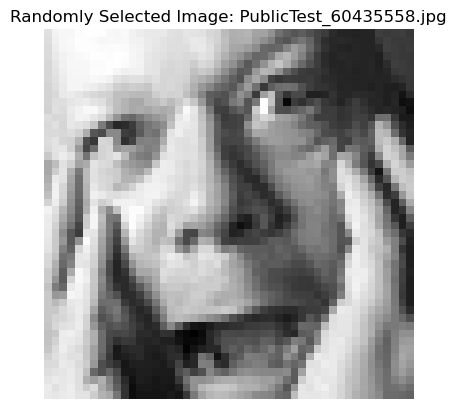

In [34]:
import os
import random
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Assuming `model` is your trained CNN model in memory
# Set up the test directory and the surprise folder path
test_dir = 'fer2013/test'
surprise_dir = os.path.join(test_dir, 'surprise')

# List all image files in the surprise folder
surprise_images = os.listdir(surprise_dir)

# Randomly select an image from the surprise folder
random_image = random.choice(surprise_images)
image_path = os.path.join(surprise_dir, random_image)

print(f"Selected image for prediction: {random_image}")
# Load and preprocess the image
image = load_img(image_path, target_size=(48, 48), color_mode='grayscale')  # Adjust target size if needed
image_array = img_to_array(image)

# Display the selected image
plt.imshow(image_array.squeeze(), cmap='gray')
plt.title(f"Randomly Selected Image: {random_image}")
plt.axis('off')  # Hide the axes
plt.show()

In [35]:
# Load and preprocess the image
image = load_img(image_path, target_size=(48, 48), color_mode='grayscale')  # Adjust target size if needed
image = img_to_array(image)
image = np.expand_dims(image, axis=0)  # Add batch dimension
image = image / 255.0  # Normalize to [0, 1]

# Make a prediction using the model
predictions = model.predict(image)
predicted_class = np.argmax(predictions)

# Mapping the predicted class to the emotion label
emotion_labels = ['angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral']
predicted_emotion = emotion_labels[predicted_class]

print(f'Predicted emotion: {predicted_emotion}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Predicted emotion: surprise


### Importing a new image and testing our model

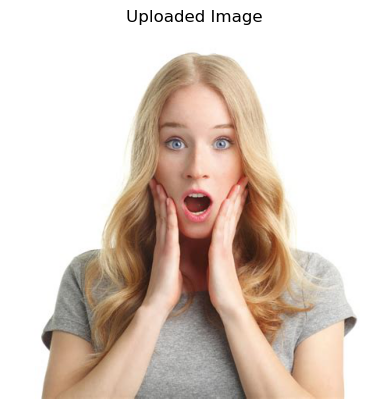

In [41]:
from PIL import Image
import matplotlib.pyplot as plt

# Path to the specific image
image_path = r'C:\Users\honey\Documents\Data Science\Course and Internships\LetsGrowMore\Task No.10 ML Model based on Facial Recognition\surprise-image1.jpeg'

# Load the image using PIL
image = Image.open(image_path)

# Display the image as it is
plt.imshow(image)
plt.title("Uploaded Image")
plt.axis('off')  # Hide the axes
plt.show()

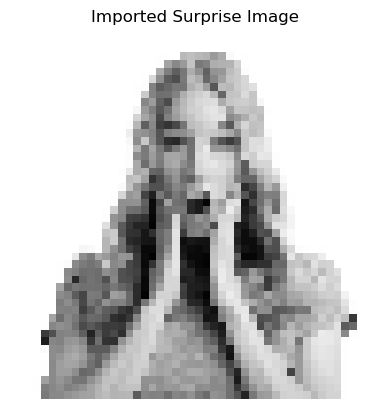

In [42]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Path to the specific image
image_path = r'C:\Users\honey\Documents\Data Science\Course and Internships\LetsGrowMore\Task No.10 ML Model based on Facial Recognition\surprise-image1.jpeg'

# Load and preprocess the image
image = load_img(image_path, target_size=(48, 48), color_mode='grayscale')  # Adjust target size if needed
image_array = img_to_array(image)

# Display the image
plt.imshow(image_array.squeeze(), cmap='gray')
plt.title("Imported Surprise Image")
plt.axis('off')  # Hide the axes
plt.show()

# Preprocess the image for model prediction
image_array = np.expand_dims(image_array, axis=0)  # Add batch dimension
image_array = image_array / 255.0  # Normalize to [0, 1]

# You can now use this image_array for prediction with your model
# predictions = model.predict(image_array)

In [43]:
# Make a prediction using the model
predictions = model.predict(image_array)
predicted_class = np.argmax(predictions)

# Mapping the predicted class to the emotion label
emotion_labels = ['angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral']
predicted_emotion = emotion_labels[predicted_class]

print(f'Predicted emotion: {predicted_emotion}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
Predicted emotion: surprise


In [44]:
import random
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Define a dictionary of moods and corresponding song recommendations
mood_to_songs = {
    'angry': ['Song A - Artist 1', 'Song B - Artist 2', 'Song C - Artist 3'],
    'disgust': ['Song D - Artist 4', 'Song E - Artist 5', 'Song F - Artist 6'],
    'fear': ['Song G - Artist 7', 'Song H - Artist 8', 'Song I - Artist 9'],
    'happy': ['Song J - Artist 10', 'Song K - Artist 11', 'Song L - Artist 12'],
    'sad': ['Song M - Artist 13', 'Song N - Artist 14', 'Song O - Artist 15'],
    'surprise': ['Song P - Artist 16', 'Song Q - Artist 17', 'Song R - Artist 18'],
    'neutral': ['Song S - Artist 19', 'Song T - Artist 20', 'Song U - Artist 21']
}

# Path to the specific image
image_path = r'C:\Users\honey\Documents\Data Science\Course and Internships\LetsGrowMore\Task No.10 ML Model based on Facial Recognition\surprise-image1.jpeg'

# Load and preprocess the image
image = load_img(image_path, target_size=(48, 48), color_mode='grayscale')  # Adjust target size if needed
image_array = img_to_array(image)

# Preprocess the image for model prediction
image_array = np.expand_dims(image_array, axis=0)  # Add batch dimension
image_array = image_array / 255.0  # Normalize to [0, 1]

# Make a prediction using the model
predictions = model.predict(image_array)
predicted_class = np.argmax(predictions)

# Mapping the predicted class to the emotion label
emotion_labels = ['angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral']
predicted_emotion = emotion_labels[predicted_class]

print(f'Predicted emotion: {predicted_emotion}')

# Recommend a song based on the detected mood
if predicted_emotion in mood_to_songs:
    recommended_song = random.choice(mood_to_songs[predicted_emotion])
    print(f"Recommended song for {predicted_emotion} mood: {recommended_song}")
else:
    print("No songs available for this mood.")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Predicted emotion: surprise
Recommended song for surprise mood: Song Q - Artist 17
